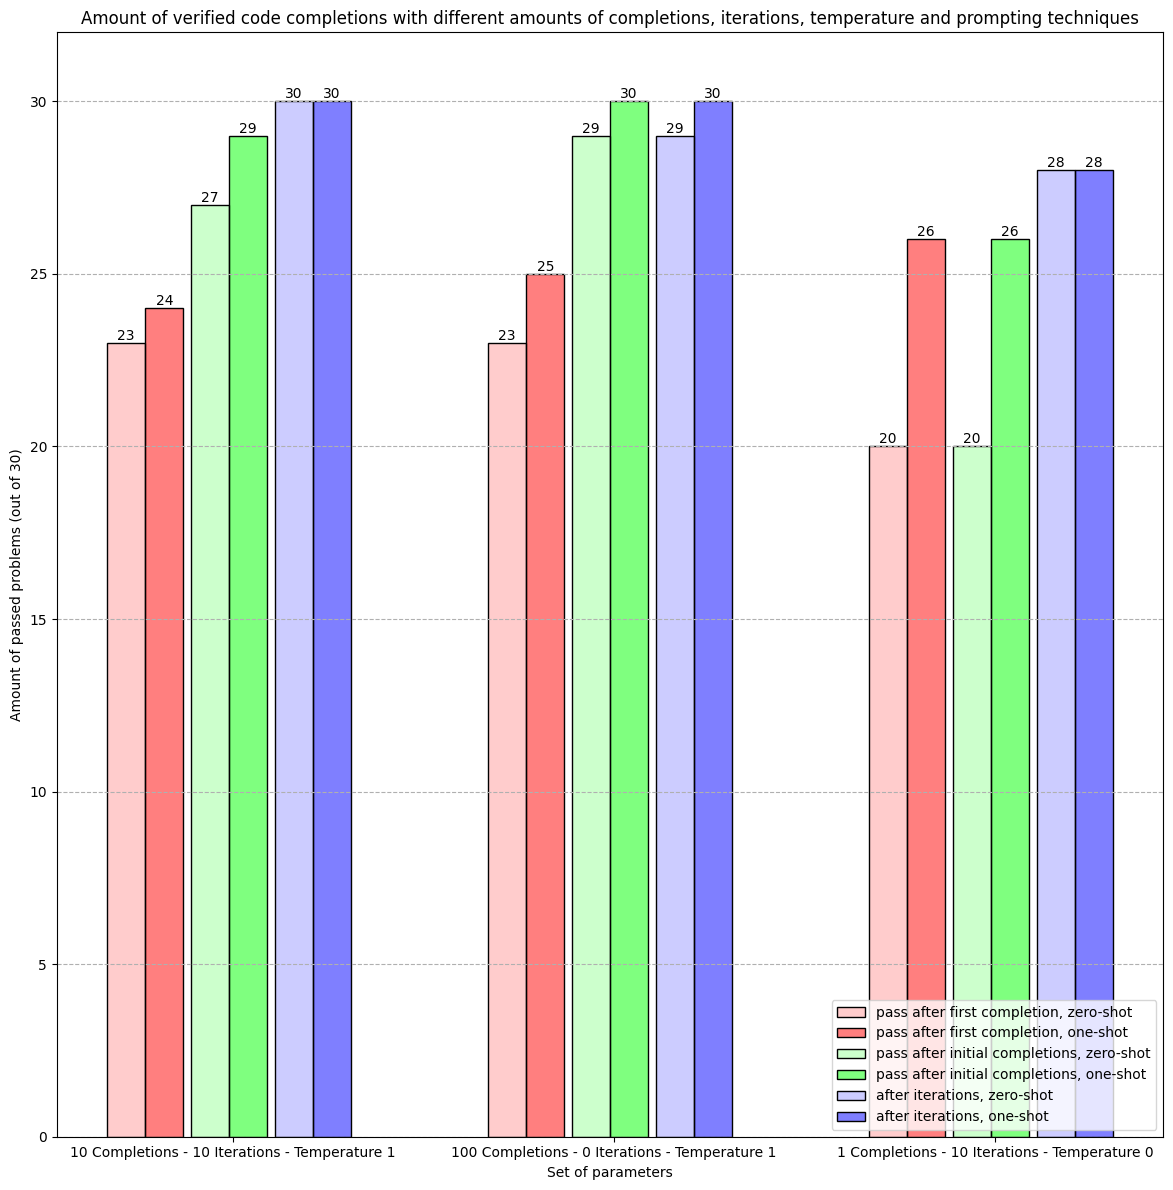

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Data
data = {
    'pass after first completion, zero-shot': [23, 23, 20],
    'pass after first completion, one-shot': [24, 25, 26],
    'pass after initial completions, zero-shot': [27, 29, 20],
    'pass after initial completions, one-shot': [29, 30, 26],
    'after iterations, zero-shot': [30, 29, 28],
    'after iterations, one-shot': [30, 30, 28]
}


index = [
    '10 Completions - 10 Iterations - Temperature 1',
    '100 Completions - 0 Iterations - Temperature 1',
    '1 Completions - 10 Iterations - Temperature 0'
]

# Create DataFrame
df = pd.DataFrame(data, index=index)
labels = index

# Create the bar plot
x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars
fig, ax = plt.subplots(figsize=(12, 12))
data_transposed = df.values.T

# Colors for each stage, with the color and transparency as tuples
colors = [
    (1, 0, 0, 0.2),  # lighter red
    (1, 0, 0, 0.5),  # darker red
    (0, 1, 0, 0.2),  # lighter green
    (0, 1, 0, 0.5),  # darker green
    (0, 0, 1, 0.2),  # lighter blue
    (0, 0, 1, 0.5)   # darker blue
]

shift_so_far = 0
# Plotting
for i in range(len(data_transposed)):
    if i % 2 == 1:
        shift = 0
    else:
        shift = 0.02  # Adjust the space between every second bar here
        
    bars = ax.bar(x + i*width + shift_so_far + shift, data_transposed[i], width, label=f'Stage {i+1}', edgecolor='black', color=colors[i])
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)
    shift_so_far += shift
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Set of parameters')
ax.set_ylabel('Amount of solved problems (out of 30)')
ax.set_title('Amount of verified code completions with different amounts of completions, iterations, temperature and prompting techniques')
ax.set_xticks(x + 0.3)
ax.set_xticklabels(labels, rotation=0, ha="center")
ax.legend(data.keys(), loc='lower right')
ax.grid(axis='y', linestyle='--')
ax.set_ylim(0, 32)

# Show the plot
plt.tight_layout()
plt.show()

# Export the plot to ../figures/bar_plot_best_parameters.png
fig.savefig('../figures/bar_plot_best_parameters.png')


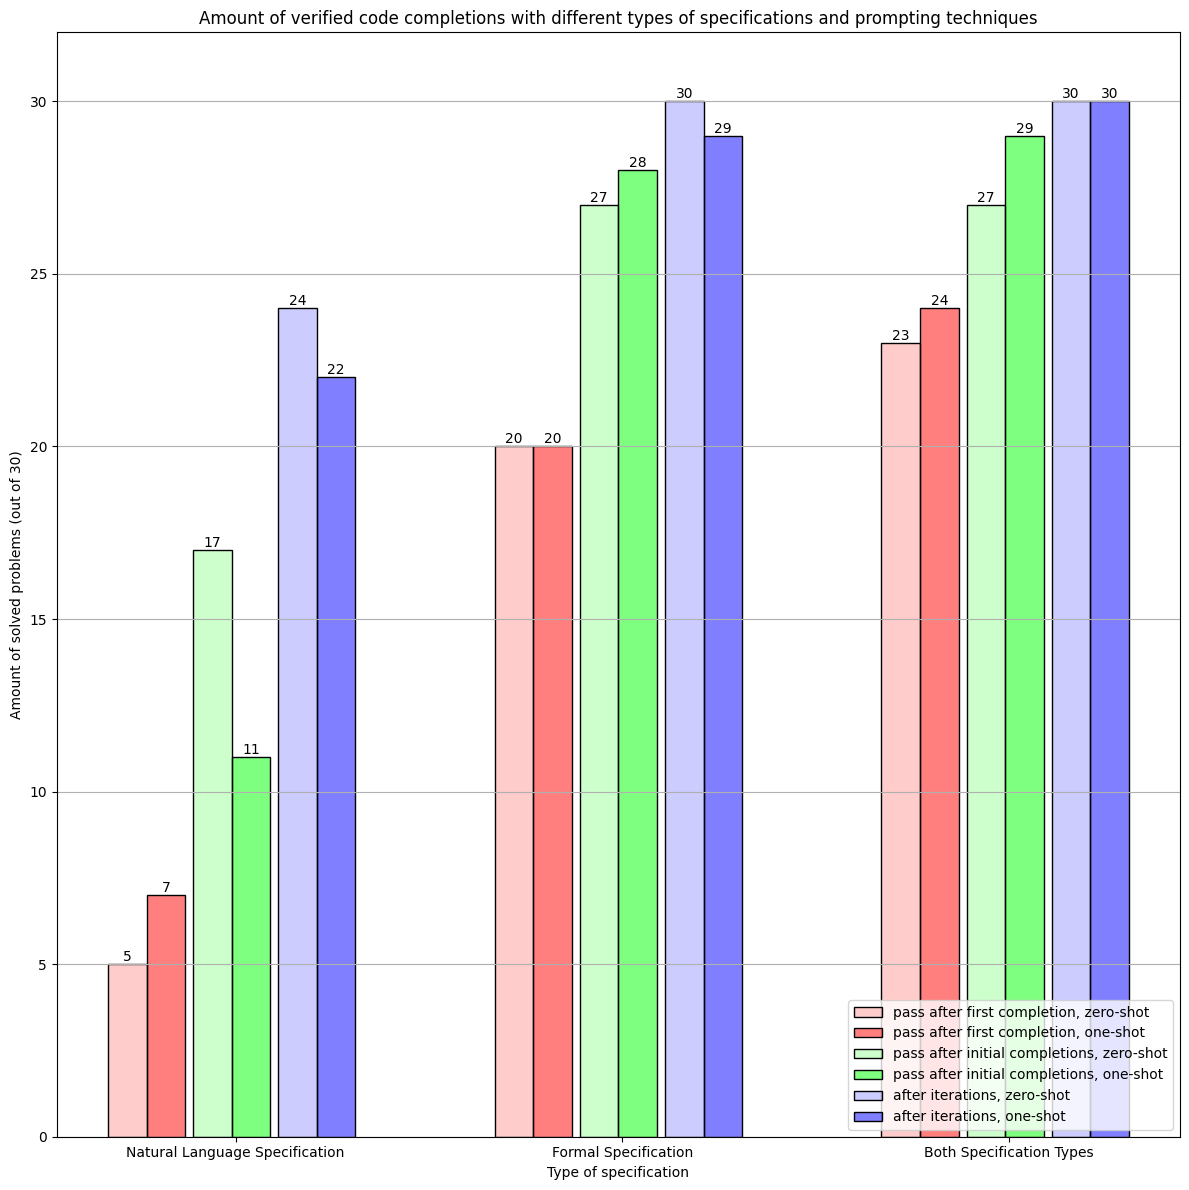

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Data
data = {
    'pass after first completion, zero-shot': [5, 20, 23],
    'pass after first completion, one-shot': [7, 20, 24],
    'pass after initial completions, zero-shot': [17, 27, 27],
    'pass after initial completions, one-shot': [11, 28, 29],
    'after iterations, zero-shot': [24, 30, 30],
    'after iterations, one-shot': [22, 29, 30]
}

index = [
    'Natural Language Specification',
    'Formal Specification',
    'Both Specification Types'
]

# Create DataFrame
df = pd.DataFrame(data, index=index)
labels = index

# Create the bar plot
x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars
fig, ax = plt.subplots(figsize=(12, 12))
data_transposed = df.values.T

# Colors for each stage, with the color and transparency as tuples
colors = [
    (1, 0, 0, 0.2),  # lighter red
    (1, 0, 0, 0.5),  # darker red
    (0, 1, 0, 0.2),  # lighter green
    (0, 1, 0, 0.5),  # darker green
    (0, 0, 1, 0.2),  # lighter blue
    (0, 0, 1, 0.5)   # darker blue
]

shift_so_far = 0
# Plotting
for i in range(len(data_transposed)):
    if i % 2 == 1:
        shift = 0
    else:
        shift = 0.02  # Adjust the space between every second bar here
        
    bars = ax.bar(x + i*width + shift_so_far + shift, data_transposed[i], width, label=f'Stage {i+1}', edgecolor='black', color=colors[i])
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)
    shift_so_far += shift
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Type of specification')
ax.set_ylabel('Amount of solved problems (out of 30)')
ax.set_title('Amount of verified code completions with different types of specifications and prompting techniques')
ax.set_xticks(x + 0.3)
ax.set_xticklabels(labels, rotation=0, ha="center")
ax.legend(data.keys(), loc='lower right')
ax.grid(axis='y')
ax.set_ylim(0, 32)

# Show the plot
plt.tight_layout()
plt.show()

# Export the plot to ../figures/bar_plot_best_parameters.png
fig.savefig('../figures/bar_plot_best_spectype.png')


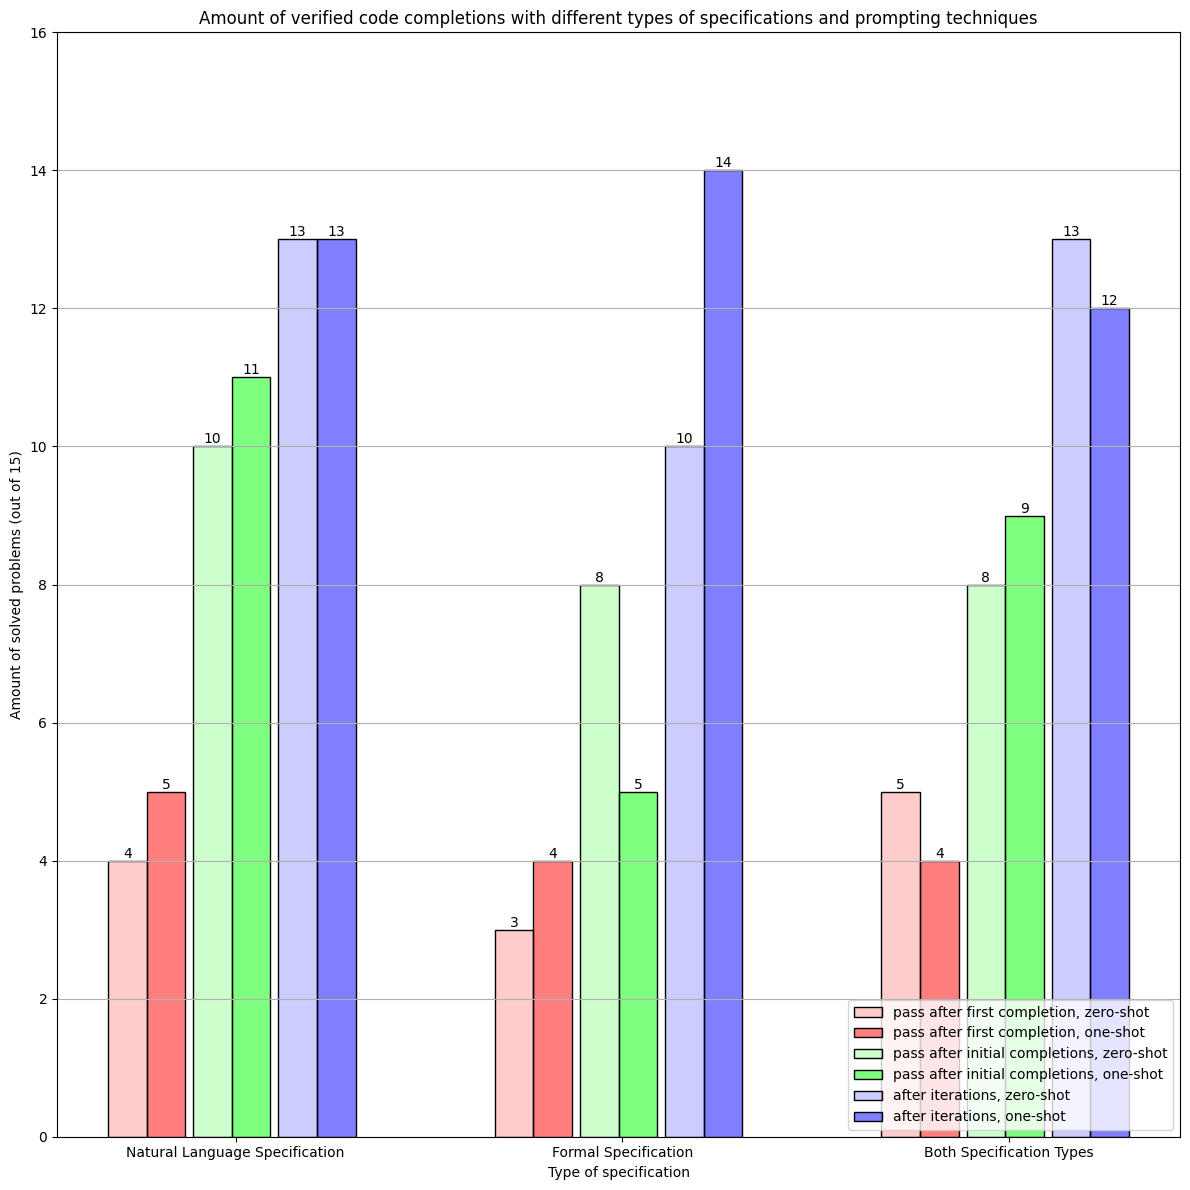

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Data
data = {
    'pass after first completion, zero-shot': [4, 3, 5],
    'pass after first completion, one-shot': [5, 4, 4],
    'pass after initial completions, zero-shot': [10, 8, 8],
    'pass after initial completions, one-shot': [11, 5, 9],
    'after iterations, zero-shot': [13, 10, 13],
    'after iterations, one-shot': [13, 14, 12]
}

index = [
    'Natural Language Specification',
    'Formal Specification',
    'Both Specification Types'
]

# Create DataFrame
df = pd.DataFrame(data, index=index)
labels = index

# Create the bar plot
x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars
fig, ax = plt.subplots(figsize=(12, 12))
data_transposed = df.values.T

# Colors for each stage, with the color and transparency as tuples
colors = [
    (1, 0, 0, 0.2),  # lighter red
    (1, 0, 0, 0.5),  # darker red
    (0, 1, 0, 0.2),  # lighter green
    (0, 1, 0, 0.5),  # darker green
    (0, 0, 1, 0.2),  # lighter blue
    (0, 0, 1, 0.5)   # darker blue
]

shift_so_far = 0
# Plotting
for i in range(len(data_transposed)):
    if i % 2 == 1:
        shift = 0
    else:
        shift = 0.02  # Adjust the space between every second bar here
        
    bars = ax.bar(x + i*width + shift_so_far + shift, data_transposed[i], width, label=f'Stage {i+1}', edgecolor='black', color=colors[i])
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)
    shift_so_far += shift
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Type of specification')
ax.set_ylabel('Amount of solved problems (out of 15)')
ax.set_title('Amount of verified code completions with different types of specifications and prompting techniques')
ax.set_xticks(x + 0.3)
ax.set_xticklabels(labels, rotation=0, ha="center")
ax.legend(data.keys(), loc='lower right')
ax.grid(axis='y')
ax.set_ylim(0, 16)

# Show the plot
plt.tight_layout()
plt.show()

# Export the plot to ../figures/bar_plot_best_parameters.png
fig.savefig('../figures/bar_plot_best_spectype_desc.png')


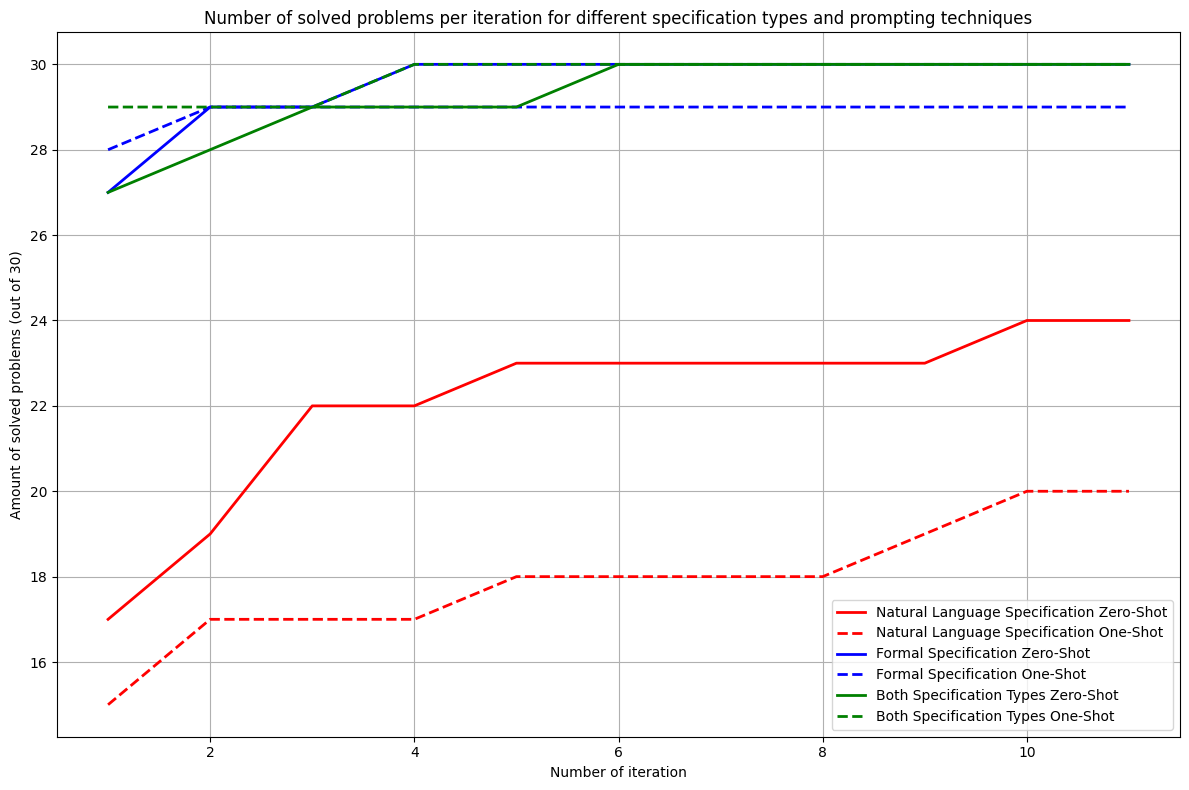

In [108]:
import matplotlib.pyplot as plt

# Data
spec_types = [
    "Natural Language Specification Zero-Shot",
    "Natural Language Specification One-Shot",
    "Formal Specification Zero-Shot",
    "Formal Specification One-Shot",
    "Both Specification Types Zero-Shot",
    "Both Specification Types One-Shot"
]

data = {
    "Natural Language Specification Zero-Shot": [17, 19, 22, 22, 23, 23, 23, 23, 23, 24, 24],
    "Natural Language Specification One-Shot": [15, 17, 17, 17, 18, 18, 18, 18, 19, 20, 20],
    "Formal Specification Zero-Shot": [27, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30],
    "Formal Specification One-Shot": [28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29],
    "Both Specification Types Zero-Shot": [27, 28, 29, 29, 29, 30, 30, 30, 30, 30, 30],
    "Both Specification Types One-Shot": [29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30]
}

line_styles = ['-', '--', '-', '--', '-', '--']
markers = ['', '', '', '', '', '']
colors = ['red', 'red', 'blue', 'blue', 'green', 'green']

# Number of completions (assuming the range is from 1 to 11)
completions = range(1, 12)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

for i, spec_type in enumerate(spec_types):
    ax.plot(completions, data[spec_type], label=spec_type, linestyle=line_styles[i], marker=markers[i], color=colors[i], linewidth=2)


# Adding labels and title
ax.set_xlabel('Number of iteration')
ax.set_ylabel('Amount of solved problems (out of 30)')
ax.set_title('Number of solved problems per iteration for different specification types and prompting techniques')
ax.legend()
ax.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

fig.savefig('../figures/line_plot_iteration_solution_tied.png')


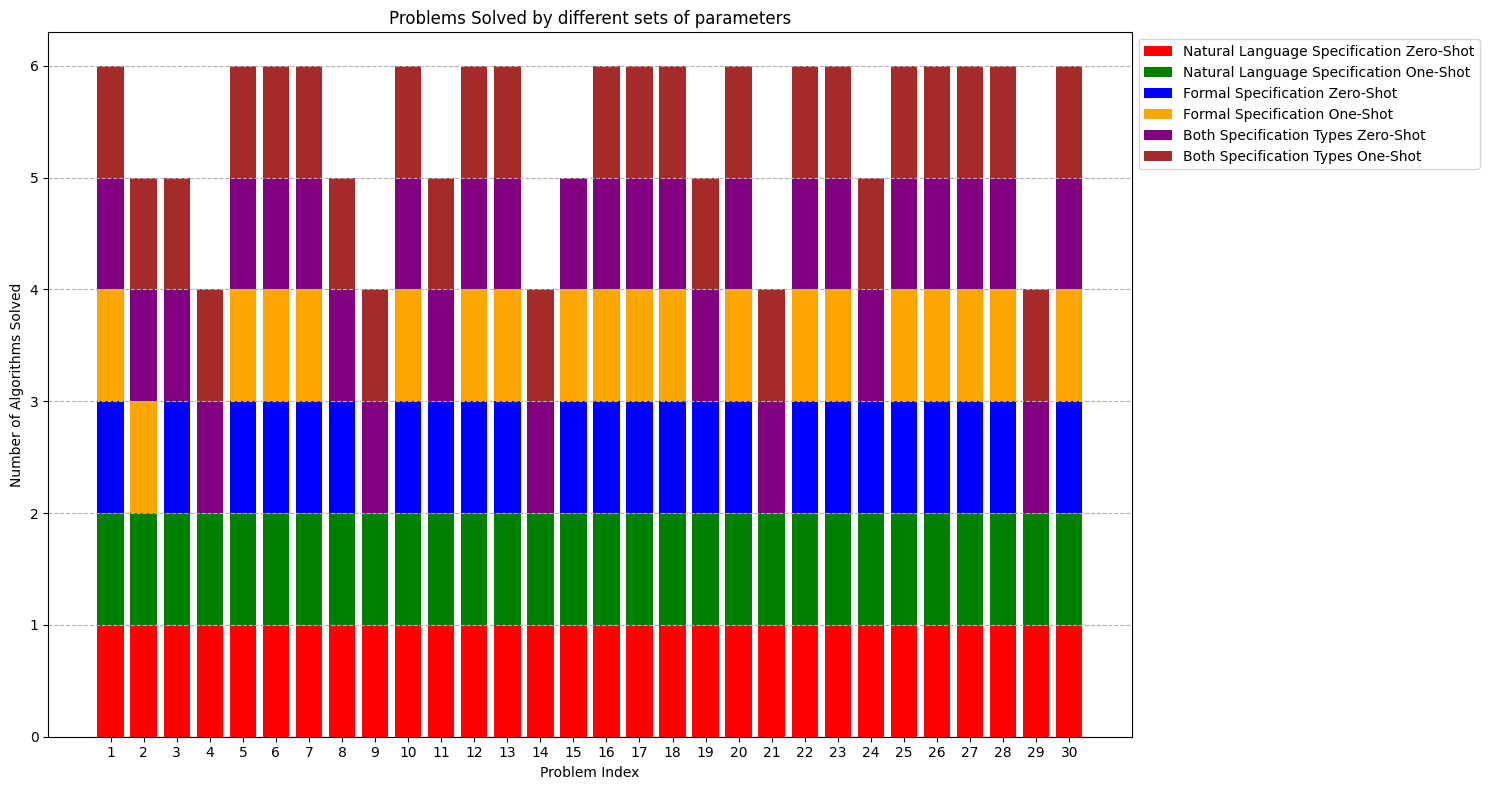

In [125]:
# Data
data = {
    "SHEET_NAME": range(1, 31),
    "Natural Language Specification Zero-Shot": ['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'],
    "Natural Language Specification One-Shot": ['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'],
    "Formal Specification Zero-Shot": ['Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y'],
    "Formal Specification One-Shot": ['Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y'],
    "Both Specification Types Zero-Shot": ['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'],
    "Both Specification Types One-Shot": ['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y']
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Convert 'Y'/'N' to 1/0
for col in df.columns[1:]:
    df[col] = df[col].apply(lambda x: 1 if x == 'Y' else 0)

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Colors for each algorithm
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown']

# Plot each algorithm's results in a stacked manner
bottom = np.zeros(len(df))
for i, col in enumerate(df.columns[1:]):
    ax.bar(df['SHEET_NAME'], df[col], bottom=bottom, label=col, color=colors[i])
    bottom += df[col]

# Adding labels and title
ax.set_xlabel('Problem Index')
ax.set_ylabel('Number of Algorithms Solved')
ax.set_title('Problems Solved by different sets of parameters')
ax.set_xticks(df['SHEET_NAME'])
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(axis='y', linestyle='--')
# Display the plot
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


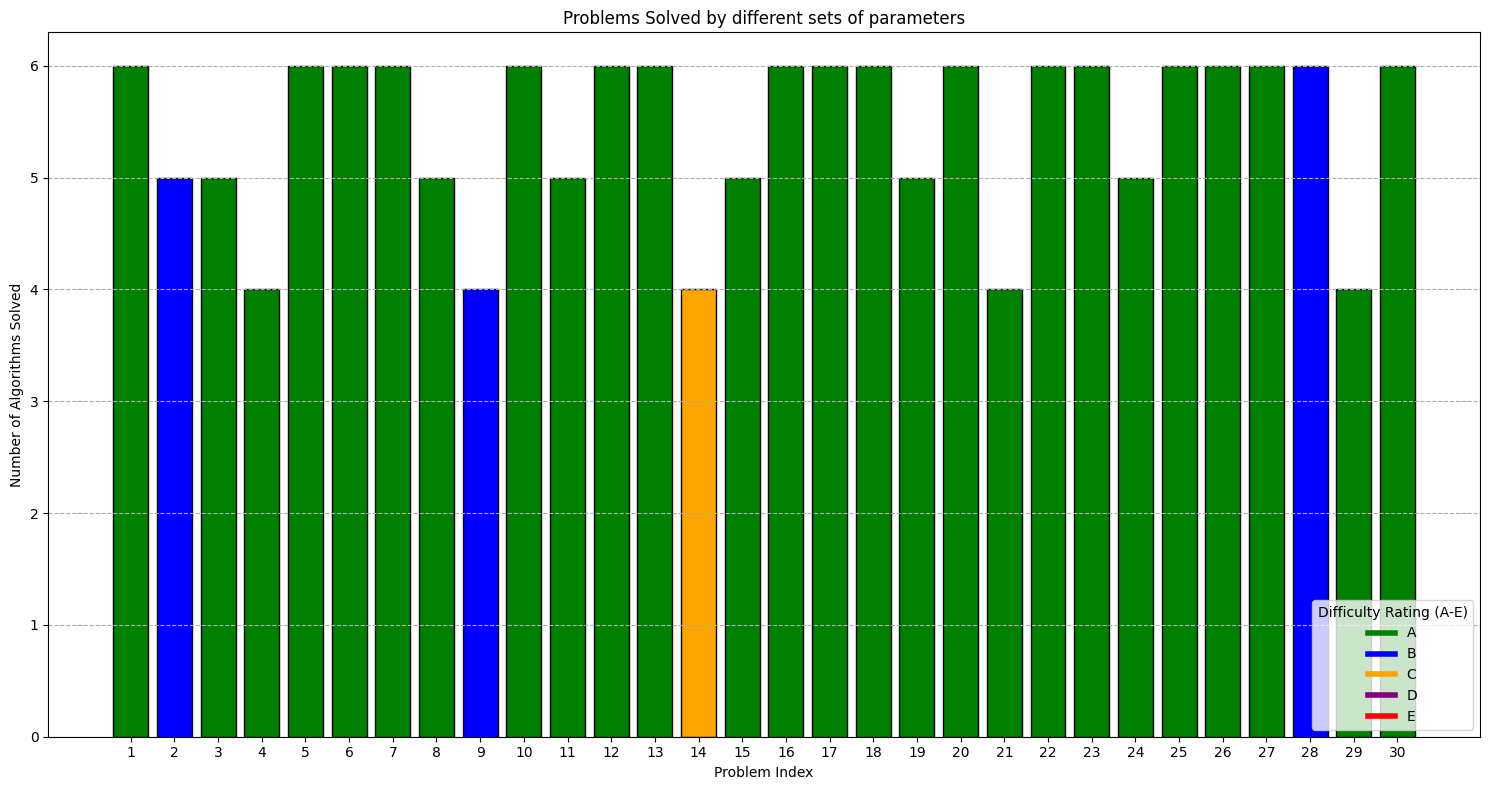

In [19]:
# Data

sheet_names = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

data = {
    "Natural Language Specification Zero-Shot": ['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'],
    "Natural Language Specification One-Shot": ['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'],
    "Formal Specification Zero-Shot": ['Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y'],
    "Formal Specification One-Shot": ['Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y'],
    "Both Specification Types Zero-Shot": ['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'],
    "Both Specification Types One-Shot": ['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y']
}

colors = pd.DataFrame({'Difficulty rating (A-E)': ['A', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'C', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A']})['Difficulty rating (A-E)'].map(difficulty_colors)
difficulty_colors = {
    'A': 'green',
    'B': 'blue',
    'C': 'orange',
    'D': 'purple',
    'E': 'red'
}


handles = [plt.Line2D([0], [0], color=color, lw=4) for color in difficulty_colors.values()]
labels = difficulty_colors.keys()

# For each index from 1 up to 30 count the amount of 'Y' in each column
values = []
for i in range(0, 30):
    # Amount of Y's
    y_count = 0
    # Count the Y's for each column
    for col in data.keys():
        # Get the values
        if data[col][i] == 'Y':
            y_count += 1
    values.append(y_count)


# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Plot each algorithm's results in a stacked manner
ax.bar(sheet_names, values, color=colors, edgecolor='black')

# Adding labels and title
ax.set_xlabel('Problem Index')
ax.set_ylabel('Number of Algorithms Solved')
ax.set_title('Problems Solved by different sets of parameters')
ax.set_xticks(sheet_names)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(axis='y', linestyle='--')
ax.legend(handles, labels, title="Difficulty Rating (A-E)", loc='lower right')

# Display the plot
plt.tight_layout()
plt.show()


     0    1    2    3    4         5    6    7    8    9   ...   20   21   22  \
1   1.0  1.0  1.0  1.0  1.0  0.692308  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
2   NaN  NaN  NaN  NaN  NaN  1.000000  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
3   NaN  NaN  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
4   NaN  NaN  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
5   NaN  NaN  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
6   NaN  NaN  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
7   NaN  NaN  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
8   NaN  NaN  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
9   NaN  NaN  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
10  NaN  NaN  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
11  NaN  NaN  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

     23   24   25   26   27

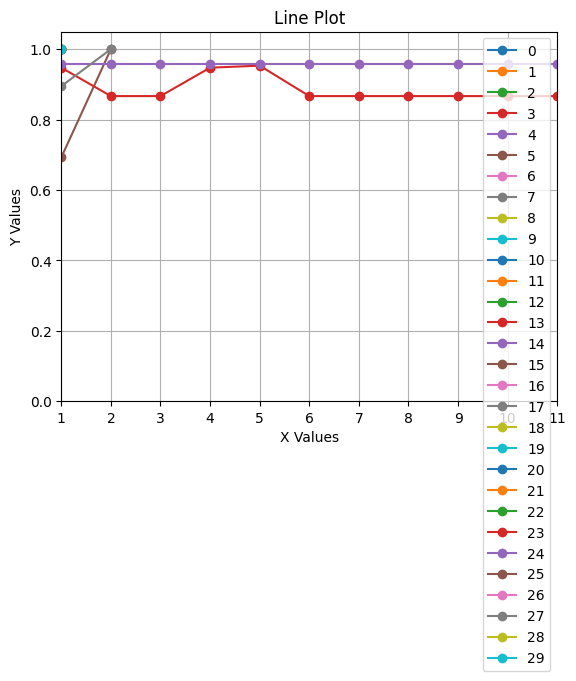

In [185]:
import matplotlib.pyplot as plt
import numpy as np

# Preparing the data
x_values = list(range(1, 12))  # X-axis values from 1 to 11
y_values = [
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [0.6923076923, 1, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [0.9473684211, 0.8666666667, 0.8666666667, 0.9473684211, 0.953125, 0.8666666667, 0.8666666667, 0.8666666667, 0.8666666667, 0.8666666667, 0.8666666667],
    [0.9565217391, 0.9565217391, 0.9565217391, 0.9565217391, 0.9565217391, 0.9565217391, 0.9565217391, 0.9565217391, 0.9565217391, 0.9565217391, 0.9565217391],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [0.8947368421, 1, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
]

# Create a dataframe
df = pd.DataFrame(y_values)

# transpose
df = df.T

# add 1 to the indices
df.index = df.index + 1
print(df)

# Transpose again
df = df

# plot
df.plot(kind='line', marker='o')

# # Transpose the list of lists to get columns
# y_values_transposed = list(map(list, zip(*y_values)))

# print(x_values, y_values[0])
# # Plotting the data
# plt.figure(figsize=(10, 6))
# plt.plot(x_values, y_values, marker='o')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Line Plot')
# set the x range
plt.xlim(1, 11)
plt.ylim(0, 1.05)
plt.xticks(x_values)  # Ensure x-axis ticks are set to 1 through 11
plt.legend()
plt.grid(True)
plt.show()

     0    1    2    3    4         5    6    7    8    9   ...   20   21   22  \
1   1.0  1.0  1.0  1.0  1.0  0.692308  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
2   NaN  NaN  NaN  NaN  NaN  1.000000  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
3   NaN  NaN  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
4   NaN  NaN  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
5   NaN  NaN  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
6   NaN  NaN  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
7   NaN  NaN  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
8   NaN  NaN  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
9   NaN  NaN  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
10  NaN  NaN  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
11  NaN  NaN  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

     23   24   25   26   27

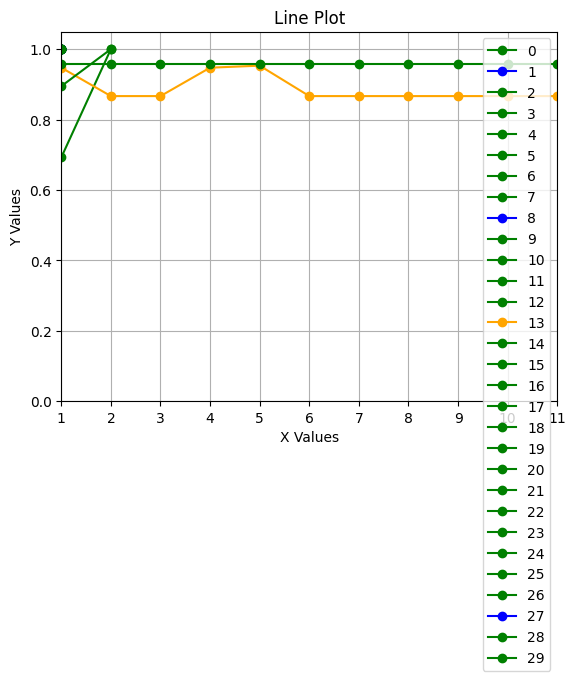

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Preparing the data
x_values = list(range(1, 12))  # X-axis values from 1 to 11
y_values = [
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [0.6923076923, 1, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [0.9473684211, 0.8666666667, 0.8666666667, 0.9473684211, 0.953125, 0.8666666667, 0.8666666667, 0.8666666667, 0.8666666667, 0.8666666667, 0.8666666667],
    [0.9565217391, 0.9565217391, 0.9565217391, 0.9565217391, 0.9565217391, 0.9565217391, 0.9565217391, 0.9565217391, 0.9565217391, 0.9565217391, 0.9565217391],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [0.8947368421, 1, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
]

# Create a dataframe
df = pd.DataFrame(y_values)

difficulty_colors = {
    'A': 'green',
    'B': 'blue',
    'C': 'orange',
    'D': 'purple',
    'E': 'red'
}

# Assign colors based on difficulty

colors = pd.DataFrame({'Difficulty rating (A-E)': ['A', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'C', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A']})['Difficulty rating (A-E)'].map(difficulty_colors)

# transpose
df = df.T

# add 1 to the indices
df.index = df.index + 1
print(df)

# Transpose again
df = df

# plot
df.plot(kind='line', marker='o', color=colors)

# # Transpose the list of lists to get columns
# y_values_transposed = list(map(list, zip(*y_values)))

# print(x_values, y_values[0])
# # Plotting the data
# plt.figure(figsize=(10, 6))
# plt.plot(x_values, y_values, marker='o')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Line Plot')
# set the x range
plt.xlim(1, 11)
plt.ylim(0, 1.05)
plt.xticks(x_values)  # Ensure x-axis ticks are set to 1 through 11
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Preparing the data
x_values = list(range(1, 12))  # X-axis values from 1 to 11
y_values = [
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [0.6923076923, 1, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [0.9473684211, 0.8666666667, 0.8666666667, 0.9473684211, 0.953125, 0.8666666667, 0.8666666667, 0.8666666667, 0.8666666667, 0.8666666667, 0.8666666667],
    [0.9565217391, 0.9565217391, 0.9565217391, 0.9565217391, 0.9565217391, 0.9565217391, 0.9565217391, 0.9565217391, 0.9565217391, 0.9565217391, 0.9565217391],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [0.8947368421, 1, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
    [1, None, None, None, None, None, None, None, None, None, None],
]

# Create a dataframe
df = pd.DataFrame(y_values)

# transpose
df = df.T

# add 1 to the indices
df.index = df.index + 1
print(df)

# Transpose again
df = df

# plot
df.plot(kind='line', marker='o')

# # Transpose the list of lists to get columns
# y_values_transposed = list(map(list, zip(*y_values)))

# print(x_values, y_values[0])
# # Plotting the data
# plt.figure(figsize=(10, 6))
# plt.plot(x_values, y_values, marker='o')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Line Plot')
# set the x range
plt.xlim(1, 11)
plt.ylim(0, 1.05)
plt.xticks(x_values)  # Ensure x-axis ticks are set to 1 through 11
plt.legend()
plt.grid(True)
plt.show()

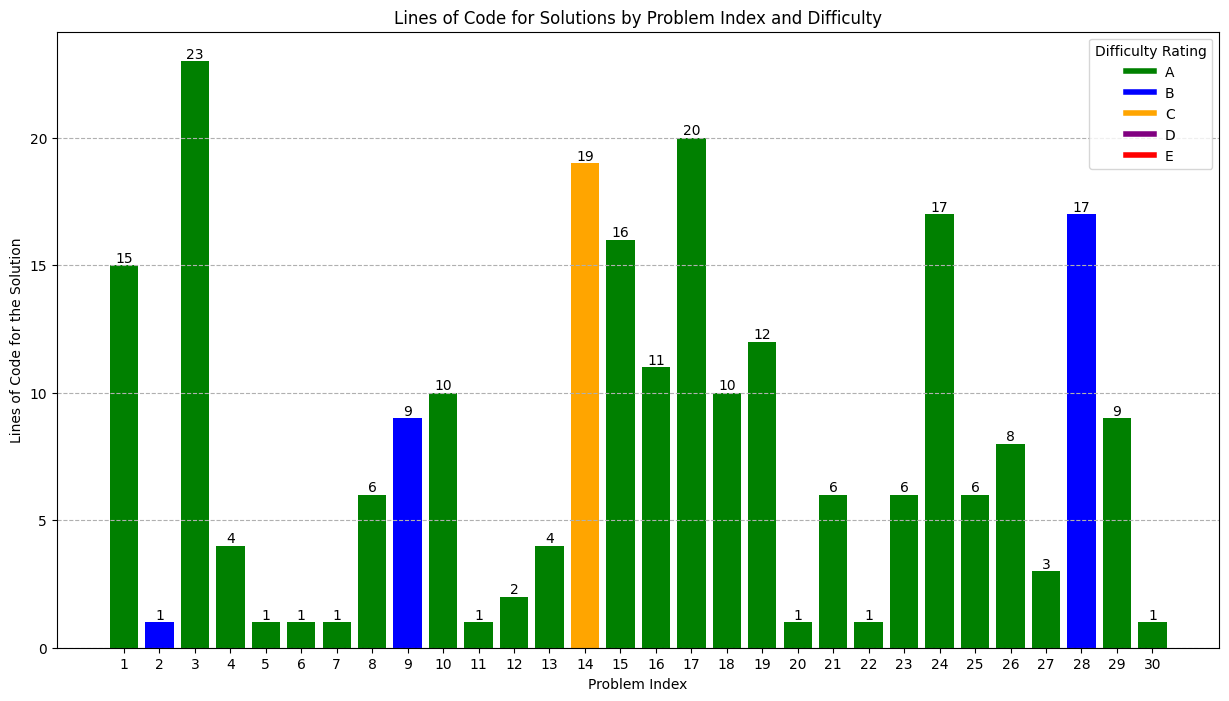

: 

In [21]:
# Data
data = {
    'index': range(1, 31),
    'Difficulty rating (A-E)': ['A', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'C', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A'],
    'Lines of code for the solution': [15, 1, 23, 4, 1, 1, 1, 6, 9, 10, 1, 2, 4, 19, 16, 11, 20, 10, 12, 1, 6, 1, 6, 17, 6, 8, 3, 17, 9, 1]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Color map for difficulties
difficulty_colors = {
    'A': 'green',
    'B': 'blue',
    'C': 'orange',
    'D': 'purple',
    'E': 'red'
}

# Assign colors based on difficulty
df['color'] = df['Difficulty rating (A-E)'].map(difficulty_colors)

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Plot bars with color coding
bars = ax.bar(df['index'], df['Lines of code for the solution'], color=df['color'])

# Adding labels and title
ax.set_xlabel('Problem Index')
ax.set_ylabel('Lines of Code for the Solution')
ax.set_title('Lines of Code for Solutions by Problem Index and Difficulty')
ax.grid(axis='y', linestyle='--')
ax.set_xticks(df['index'])

# add values above
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Create custom legend
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in difficulty_colors.values()]
labels = difficulty_colors.keys()
ax.legend(handles, labels, title="Difficulty Rating")

# Display the plot
plt.show()